In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Prep

### Read Data

In [2]:
df_train_raw = pd.read_csv('data/train.csv.zip', low_memory=False)
df_train_raw.head().transpose()

,0,1,2,3,4
GameId,2017090700,2017090700,2017090700,2017090700,2017090700
PlayId,20170907000118,20170907000118,20170907000118,20170907000118,20170907000118
Team,away,away,away,away,away
X,73.91,74.67,74,71.46,69.32
Y,34.84,32.64,33.2,27.7,35.42
S,1.69,0.42,1.22,0.42,1.82
A,1.13,1.35,0.59,0.54,2.43
Dis,0.4,0.01,0.31,0.02,0.16
Orientation,81.99,27.61,3.01,359.77,12.63
Dir,177.18,198.7,202.73,105.64,164.31


In [102]:
print (len(df_train_raw.index))
print (len(df_train_raw.loc[df_train_raw['OffenseFormation'].isna()].index))

509762
110


In [4]:
df_train_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GameId,509762.0,2.017594e+09,4.997098e+05,2.017091e+09,2.017111e+09,2.017123e+09,2.018110e+09,2.018123e+09
PlayId,509762.0,2.017594e+13,4.997098e+09,2.017091e+13,2.017111e+13,2.017123e+13,2.018110e+13,2.018123e+13
X,509762.0,6.004030e+01,2.543526e+01,6.600000e-01,3.909000e+01,6.029000e+01,8.097000e+01,1.168400e+02
Y,509762.0,2.678354e+01,7.238206e+00,1.850000e+00,2.273000e+01,2.679000e+01,3.086000e+01,5.645000e+01
S,509762.0,2.591912e+00,1.383601e+00,0.000000e+00,1.500000e+00,2.470000e+00,3.560000e+00,9.410000e+00
A,509762.0,1.683176e+00,9.764122e-01,0.000000e+00,9.400000e-01,1.540000e+00,2.290000e+00,1.471000e+01
Dis,509762.0,2.794058e-01,1.454822e-01,0.000000e+00,1.700000e-01,2.700000e-01,3.900000e-01,1.390000e+00
Orientation,509744.0,1.802478e+02,1.042983e+02,0.000000e+00,9.063000e+01,1.797000e+02,2.704000e+02,3.600000e+02
Dir,509748.0,1.799339e+02,1.063195e+02,0.000000e+00,8.983000e+01,1.800900e+02,2.701900e+02,3.600000e+02
NflId,509762.0,2.344703e+06,6.418871e+05,2.220000e+02,2.532865e+06,2.543765e+06,2.555343e+06,2.561671e+06


### Data Cleaning

In [3]:
def _fix_teams(df):
    # convert all columns with team names to use the same abbreviations
    fix_dict = {
        'ARZ' : 'ARI',
        'BLT' : 'BAL',
        'CLV' : 'CLE',
        'HST' : 'HOU'
    }
    df['FieldPosition'] = df['FieldPosition'].replace(fix_dict)
    df['PossessionTeam'] = df['PossessionTeam'].replace(fix_dict)
    
    return df

def _height_to_inches(df):
    # convert all player heights to inches 
    splitted = df['PlayerHeight'].astype(str).str.split('-', n=1, expand=True)
    df['PlayerHeight'] = splitted[0].astype(int)*12 + splitted[1].astype(int)
    
    return df

def _offense_same_direction(df):
    # convert relevant columns so that all offensive plays happen in the same direction
    df['ToLeft'] = df['PlayDirection']=='left'
    df['IsRusher'] = df['NflId'] == df['NflIdRusher']
    df['HomeTeamOnOffense'] = df['PossessionTeam'] == df['HomeTeamAbbr']
    df['OnOffense'] = (((df['HomeTeamOnOffense']) & (df['Team']=='home')) | \
        ((~df['HomeTeamOnOffense']) & (df['Team']=='away')))
    df['OffenseInOwnHalf'] = df['PossessionTeam'] == df['FieldPosition']
    df['YardsFromOwnGoal'] = abs(df['YardLine'] + ((df['OffenseInOwnHalf'].astype(int) - 1) * 100))
    df['X'] = abs(df['X'] - (df['ToLeft'].astype(int) * 120)) - 10
    df['Y'] = abs(df['Y'] - (df['ToLeft'].astype(int) * 160.0/3))
    
    df['adj_dir'] = (df['ToLeft']) & (df['Dir']<90)
    df['Dir'] = df['Dir'] + (df['adj_dir'].astype(int) * 360)
    df['adj_dir'] = (~df['ToLeft']) & (df['Dir']>270)
    df['Dir'] = df['Dir'] - (df['adj_dir'].astype(int) * 360)
    df['Dir'] = df['Dir'] - (df['ToLeft'].astype(int) * 180)
    df['Dir'] = df['Dir'] - 90
    df['Dir'] = df['Dir']*np.pi/180 # convert to radians from degrees
    df = df.drop('adj_dir',1)
    
    return df

def _net_game_score(df):
    df['OffenseNetScore'] = (df['HomeScoreBeforePlay'] - df['VisitorScoreBeforePlay']) * \
        (df['HomeTeamOnOffense'].astype(int) - (~df['HomeTeamOnOffense'].astype(int)))
    
    return df

def _offense_formation(df):
    df['FormationShotgun'] = (df['OffenseFormation']=='SHOTGUN').astype(int)
    df['FormationSingleback'] = (df['OffenseFormation']=='SINGLEBACK').astype(int)
    df['FormationJumbo'] = (df['OffenseFormation']=='JUMBO').astype(int)
    df['FormationPistol'] = (df['OffenseFormation']=='PISTOL').astype(int)
    df['FormationIForm'] = (df['OffenseFormation']=='I_FORM').astype(int)
    df['FormationAce'] = (df['OffenseFormation']=='ACE').astype(int)
    df['FormationWildcat'] = (df['OffenseFormation']=='WILDCAT').astype(int)
    df['FormationEmpty'] = (df['OffenseFormation']=='EMPTY').astype(int)
    
    return df

def _offense_personnel(df):
    splitted = df['OffensePersonnel'].str.split(',', expand=True).fillna('0')
    cols = splitted.columns
    df['PersonnelRB'] = 0
    df['PersonnelWR'] = 0
    df['PersonnelTE'] = 0
    for c in cols:
        df['PersonnelRB'] += (splitted[c].str.strip().str.split(' ', n=1, expand=True)[0].astype(int)) * \
            (splitted[c].str.contains('RB')).astype(int)
        df['PersonnelWR'] += (splitted[c].str.strip().str.split(' ', n=1, expand=True)[0].astype(int)) * \
            (splitted[c].str.contains('WR')).astype(int)
        df['PersonnelTE'] += (splitted[c].str.strip().str.split(' ', n=1, expand=True)[0].astype(int)) * \
            (splitted[c].str.contains('TE')).astype(int)
        
    return df

def _defense_personnel(df):
    splitted = df['DefensePersonnel'].str.split(',', expand=True).fillna('0')
    cols = splitted.columns
    df['PersonnelDL'] = 0
    df['PersonnelLB'] = 0
    df['PersonnelDB'] = 0
    for c in cols:
        df['PersonnelDL'] += (splitted[c].str.strip().str.split(' ', n=1, expand=True)[0].astype(int)) * \
            (splitted[c].str.contains('DL')).astype(int)
        df['PersonnelLB'] += (splitted[c].str.strip().str.split(' ', n=1, expand=True)[0].astype(int)) * \
            (splitted[c].str.contains('LB')).astype(int)
        df['PersonnelDB'] += (splitted[c].str.strip().str.split(' ', n=1, expand=True)[0].astype(int)) * \
            (splitted[c].str.contains('DB')).astype(int)
        
    return df

def _clock_to_seconds(df):
    # convert GameClock and Quarter into number of seconds left in game
    splitted = df['GameClock'].str.split(':', n=2, expand=True)
    df['SecondsRemaining_quarter'] = splitted[0].astype(int)*60 + splitted[1].astype(int)
    df['SecondsRemaining_half'] = df['SecondsRemaining_quarter'] + ((np.remainder(df['Quarter'], 2))*15*60) - \
        (np.floor(df['Quarter']/5)*15*60)
    df['SecondsRemaining_game'] = df['SecondsRemaining_quarter'] + ((4-df['Quarter'])*15*60)
    
    return df

def clean_data(df):
    # wrapper function to run all cleaning function above on a single dataframe
    df = _fix_teams(df)
    df = _height_to_inches(df)
    df = _offense_same_direction(df)
    df = _net_game_score(df)
    df = _offense_formation(df)
    df = _offense_personnel(df)
    df = _defense_personnel(df)
    df = _clock_to_seconds(df)
    
    return df

In [4]:
df_clean = clean_data(df_train_raw)

### Data Transformation

Some potential features to try:

• seconds remaining in game

• game closeness/play leverage

• offensive/defensive personnel

• offense formation

• player height

• player weight

• number of players in the box, on the left side, on the right side, etc.

• diff in defense/offense number of players in box and on each side

• defensive gap size (diff between two adjacent defenders?)

• runner velocity relative to closest defender

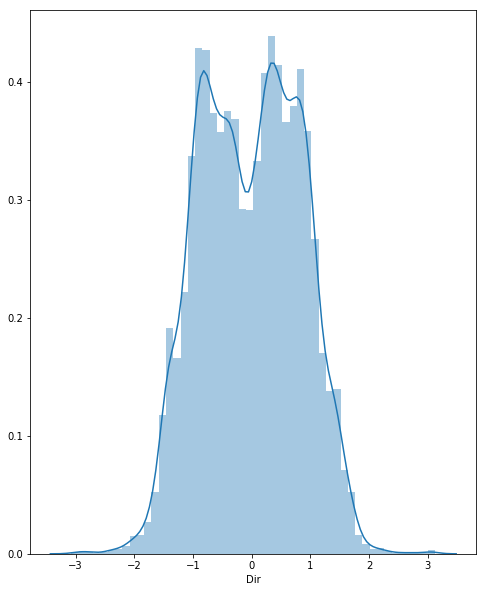

In [38]:
sns.distplot(df_clean.loc[df_clean['IsRusher']]['Dir'])

In [5]:
def transform_data(df):
    # Function to take raw training data and output transformed data ready for model training
    out_cols = ['GameId','PlayId','Yards','YardsFromOwnGoal','DefendersInTheBox','Down','Distance']
    
    # Rusher direction, speed, and acceleration at handoff
    df_rushers = df.loc[df['IsRusher']]
    df_rushers = df_rushers[['GameId','PlayId','Dir','S','A','X','Y','PlayerHeight','PlayerWeight','Position']]
    df_rushers = df_rushers.rename(columns={'Dir':'RusherDir', 'S':'RusherSpeed', 'A':'RusherAcceleration', 
        'X':'RusherX', 'Y':'RusherY', 'PlayerHeight':'RusherHeight', 'PlayerWeight':'RusherWeight'})
    
    # Convert RusherPosition to one-hot encoding
    df_rushers['RusherRB'] = (df_rushers['Position']=='RB').astype(int)
    df_rushers['RusherQB'] = (df_rushers['Position']=='QB').astype(int)
    df_rushers['RusherWR'] = (df_rushers['Position']=='WR').astype(int)
    df_rushers['RusherTE'] = (df_rushers['Position']=='TE').astype(int)
    df_rushers['RusherFB'] = (df_rushers['Position'].isin(['FB','HB'])).astype(int)
    df_rushers['RusherD'] = (df_rushers['Position'].isin(['CB','DT','DE'])).astype(int)
    
    df = df.merge(df_rushers, on=['GameId','PlayId'], how='left')
    
    # Rusher relative X position to line of scrimmage
    df['RusherRelX'] = df['RusherX'] - df['YardsFromOwnGoal']
    
    # Rusher forward component of velocity
    df['RusherSpeedForward'] = df['RusherSpeed']*np.cos(df['RusherDir'])
    
    # Distance from rusher to closest defender
    df['DistanceToRusher'] = np.sqrt(np.square(df['RusherX'] - df['X']) + np.square(df['RusherY'] - df['Y']))
    df['ClosestDefender'] = df['DistanceToRusher'] * (df['OnOffense'].astype(int) - 1)
    df['ClosestDefender'] = df['ClosestDefender'].replace(0., -100.)
    
    # Distance from rusher position in 1 second, based on velocity only, to closest defender
    df['DistanceToRusherOneSecond'] = np.sqrt(np.square(df['RusherX'] - df['X'] + df['RusherSpeedForward']) + \
                            np.square(df['RusherY'] - df['Y'] + (df['RusherSpeed']*np.sin(df['RusherDir']))))
    df['ClosestDefenderOneSecond'] = df['DistanceToRusherOneSecond'] * (df['OnOffense'].astype(int) - 1)
    df['ClosestDefenderOneSecond'] = df['ClosestDefenderOneSecond'].replace(0., -100.)
    
    # Distance from rusher position in 0.5 seconds, based on velocity only, to closest defender
    df['DistanceToRusherHalfSecond'] = np.sqrt(np.square(df['RusherX'] - df['X'] + (df['RusherSpeedForward']/2)) + \
                            np.square(df['RusherY'] - df['Y'] + (df['RusherSpeed']*np.sin(df['RusherDir'])/2)))
    df['ClosestDefenderHalfSecond'] = df['DistanceToRusherHalfSecond'] * (df['OnOffense'].astype(int) - 1)
    df['ClosestDefenderHalfSecond'] = df['ClosestDefenderHalfSecond'].replace(0., -100.)
    
    # Angle from rusher's current direction to the direction towards each player
    df['AngleToRusherDir'] = np.arctan((df['X'] - df['RusherX'])/(df['Y'] - df['RusherY'])) - df['RusherDir']
    
    # Distance to rusher in 0.001 seconds - for seeing if rusher is moving toward or away from player
    df['DistanceToRusherInc'] = np.sqrt(np.square(df['RusherX'] - df['X'] + (df['RusherSpeedForward']/1000)) \
                            + np.square(df['RusherY'] - df['Y'] + (df['RusherSpeed']*np.sin(df['RusherDir'])/1000)))
    
    # Angle within 30 degrees of rusher direction, and distance within 5 yards
    df['InRusherSlice_60deg5yd'] = ((np.absolute(df['AngleToRusherDir'])<np.pi/6) & \
                                    (df['DistanceToRusher']>df['DistanceToRusherInc']) & \
                                    (df['DistanceToRusher']<=5.0)).fillna(0).astype(int)
    df['DefendersInRusherSlice_60deg5yd'] = ((~df['OnOffense']) & \
                                             (df['InRusherSlice_60deg5yd']==1)).fillna(0).astype(int)
    df['NetDefendersInRusherSlice_60deg5yd'] = ((~df['OnOffense']) & \
                                             (df['InRusherSlice_60deg5yd']==1)).fillna(0).astype(int) - \
                                                ((df['OnOffense']) & \
                                             (df['InRusherSlice_60deg5yd']==1)).fillna(0).astype(int)
    
    # Angle within 45 degrees of rusher direction, and distance within 5 yards
    df['InRusherSlice_90deg5yd'] = ((np.absolute(df['AngleToRusherDir'])<np.pi/4) & \
                                    (df['DistanceToRusher']>df['DistanceToRusherInc']) & \
                                    (df['DistanceToRusher']<=5.0)).fillna(0).astype(int)
    df['DefendersInRusherSlice_90deg5yd'] = ((~df['OnOffense']) & \
                                             (df['InRusherSlice_90deg5yd']==1)).fillna(0).astype(int)
    df['NetDefendersInRusherSlice_90deg5yd'] = ((~df['OnOffense']) & \
                                             (df['InRusherSlice_90deg5yd']==1)).fillna(0).astype(int) - \
                                                ((df['OnOffense']) & \
                                             (df['InRusherSlice_90deg5yd']==1)).fillna(0).astype(int)
    
    # Angle within 45 degrees of rusher direction, and distance within 10 yards
    df['InRusherSlice_90deg10yd'] = ((np.absolute(df['AngleToRusherDir'])<np.pi/4) & \
                                    (df['DistanceToRusher']>df['DistanceToRusherInc']) & \
                                    (df['DistanceToRusher']<=10.0)).fillna(0).astype(int)
    df['DefendersInRusherSlice_90deg10yd'] = ((~df['OnOffense']) & \
                                             (df['InRusherSlice_90deg10yd']==1)).fillna(0).astype(int)
    df['NetDefendersInRusherSlice_90deg10yd'] = ((~df['OnOffense']) & \
                                             (df['InRusherSlice_90deg10yd']==1)).fillna(0).astype(int) - \
                                                ((df['OnOffense']) & \
                                             (df['InRusherSlice_90deg10yd']==1)).fillna(0).astype(int)
    
    # Include the calculated columns in the output
    out_cols.extend(['RusherDir','RusherSpeed','RusherAcceleration','ClosestDefender','RusherRelX','RusherY',
                    'RusherSpeedForward','ClosestDefenderOneSecond','ClosestDefenderHalfSecond',
                    'DefendersInRusherSlice_60deg5yd','NetDefendersInRusherSlice_60deg5yd',
                    'DefendersInRusherSlice_90deg5yd','NetDefendersInRusherSlice_90deg5yd',
                    'DefendersInRusherSlice_90deg10yd','NetDefendersInRusherSlice_90deg10yd',
                    'RusherRB','RusherQB','RusherWR','RusherTE','RusherFB','RusherD', 'RusherHeight', 'RusherWeight',
                    'OffenseNetScore','FormationShotgun','FormationWildcat','FormationIForm','FormationEmpty',
                    'FormationSingleback','FormationJumbo','FormationPistol','FormationAce','PersonnelRB',
                    'PersonnelWR','PersonnelTE','PersonnelDL','PersonnelLB','PersonnelDB','SecondsRemaining_quarter',
                    'SecondsRemaining_half','SecondsRemaining_game'])
    
    # Aggregate by play. Use max for everything, and change negatives back to positives after
    agg_dict = {'Yards':max, 'YardsFromOwnGoal':max, 'Down':max, 'Distance':max, 'RusherHeight':max,
                'RusherWeight':max, 'DefendersInTheBox':max, 'RusherDir':max, 'RusherSpeed':max,
                'RusherAcceleration':max, 'ClosestDefender':max, 'RusherRelX':max, 'RusherY':max,
                'RusherSpeedForward':max, 'ClosestDefenderOneSecond':max, 'ClosestDefenderHalfSecond':max,
                'DefendersInRusherSlice_60deg5yd':sum, 'NetDefendersInRusherSlice_60deg5yd':sum,
                'DefendersInRusherSlice_90deg5yd':sum, 'NetDefendersInRusherSlice_90deg5yd':sum,
                'DefendersInRusherSlice_90deg10yd':sum, 'NetDefendersInRusherSlice_90deg10yd':sum,
                'RusherRB':max, 'RusherQB':max, 'RusherWR':max, 'RusherTE':max, 'RusherFB':max, 'RusherD':max,
                'OffenseNetScore':max, 'FormationShotgun':max, 'FormationWildcat':max, 'FormationIForm':max,
                'FormationEmpty':max, 'FormationSingleback':max, 'FormationJumbo':max, 'FormationPistol':max,
                'FormationAce':max, 'PersonnelRB':max, 'PersonnelWR':max, 'PersonnelTE':max, 'PersonnelDL':max,
                'PersonnelLB':max, 'PersonnelDB':max, 'SecondsRemaining_quarter':max, 'SecondsRemaining_half':max,
                'SecondsRemaining_game':max}
    df = df[out_cols].groupby(['GameId','PlayId']).agg(agg_dict).reset_index()
    
    df['ClosestDefender'] = df['ClosestDefender']*-1
    df['ClosestDefenderOneSecond'] = df['ClosestDefenderOneSecond']*-1
    df['ClosestDefenderHalfSecond'] = df['ClosestDefenderHalfSecond']*-1
    
    return df

In [6]:
df_transformed = transform_data(df_clean)
df_transformed.describe()

,GameId,PlayId,Yards,YardsFromOwnGoal,Down,Distance,RusherHeight,RusherWeight,DefendersInTheBox,RusherDir,...,FormationAce,PersonnelRB,PersonnelWR,PersonnelTE,PersonnelDL,PersonnelLB,PersonnelDB,SecondsRemaining_quarter,SecondsRemaining_half,SecondsRemaining_game
count,2.317100e+04,2.317100e+04,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23168.000000,23171.000000,...,23171.000000,23171.000000,23171.000000,23171.000000,23171.00000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000
mean,2.017594e+09,2.017594e+13,4.212334,47.961849,1.520651,8.329248,71.125717,217.142851,6.943025,-0.021453,...,0.000043,1.188943,2.296923,1.427258,3.47430,2.967114,4.557939,464.673903,918.577489,1810.498425
std,4.997201e+05,4.997201e+09,6.436300,25.160852,0.675001,3.795286,1.859418,13.477034,0.991151,0.841559,...,0.006569,0.405870,0.792639,0.649562,0.79052,0.828260,0.683013,263.440168,527.392506,1070.808083
min,2.017091e+09,2.017091e+13,-14.000000,1.000000,1.000000,1.000000,66.000000,153.000000,1.000000,-3.072827,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,-890.000000
25%,2.017111e+09,2.017111e+13,1.000000,26.000000,1.000000,6.000000,70.000000,210.000000,6.000000,-0.717679,...,0.000000,1.000000,2.000000,1.000000,3.00000,2.000000,4.000000,233.000000,455.000000,900.000000
50%,2.017123e+09,2.017123e+13,3.000000,44.000000,1.000000,10.000000,71.000000,218.000000,7.000000,0.009599,...,0.000000,1.000000,2.000000,1.000000,4.00000,3.000000,5.000000,464.000000,911.000000,1800.000000
75%,2.018110e+09,2.018110e+13,6.000000,68.000000,2.000000,10.000000,72.000000,225.000000,8.000000,0.653102,...,0.000000,1.000000,3.000000,2.000000,4.00000,4.000000,5.000000,694.000000,1382.000000,2737.000000
max,2.018123e+09,2.018123e+13,99.000000,99.000000,4.000000,40.000000,78.000000,352.000000,11.000000,3.127979,...,1.000000,3.000000,5.000000,4.000000,7.00000,6.000000,8.000000,900.000000,1800.000000,3600.000000


In [82]:
# just testing things out, please ignore
df_test = df_clean.head(20)
df_rushers = df_test.loc[df_test['IsRusher']]
df_rushers = df_rushers[['GameId','PlayId','Dir','S','A','X','Y']]
df_rushers = df_rushers.rename(columns={'Dir':'RusherDir', 'S':'RusherSpeed', 'A':'RusherAcceleration', 
        'X':'RusherX', 'Y':'RusherY'})
df_test = df_test.merge(df_rushers, on=['GameId','PlayId'], how='left')
df_test = df_test[['X','Y','RusherX','RusherY','RusherDir','RusherSpeed','OnOffense','YardsFromOwnGoal','Yards']]
df_test['DistanceToRusher'] = np.sqrt(np.square(df_test['RusherX'] - df_test['X']) + \
                                      np.square(df_test['RusherY'] - df_test['Y']))
df_test['DistanceToRusherInc'] = np.sqrt(np.square(df_test['RusherX'] - df_test['X'] + (df_test['RusherSpeed']*np.cos(df_test['RusherDir'])/1000)) + \
                                      np.square(df_test['RusherY'] - df_test['Y'] + (df_test['RusherSpeed']*np.sin(df_test['RusherDir'])/1000)))
df_test['AngleToRusherDir'] = np.arctan((df_test['X'] - df_test['RusherX'])/ \
                                        (df_test['Y'] - df_test['RusherY'])) - df_test['RusherDir']
df_test['InRusherSlice_90deg5yd'] = ((np.absolute(df_test['AngleToRusherDir'])<np.pi/4) & \
                                    (df_test['DistanceToRusher']>df_test['DistanceToRusherInc']) & \
                                    (df_test['DistanceToRusher']<=5.0)).fillna(0).astype(int)
df_test['DefendersInRusherSlice_90deg5yd'] = ((~df_test['OnOffense']) & \
                                              (df_test['InRusherSlice_90deg5yd']==1)).fillna(0).astype(int)
df_test['NetDefendersInRusherSlice_90deg5yd'] = ((~df_test['OnOffense']) & \
                                              (df_test['InRusherSlice_90deg5yd']==1)).fillna(0).astype(int) - \
                                                ((df_test['OnOffense']) & \
                                              (df_test['InRusherSlice_90deg5yd']==1)).fillna(0).astype(int)
df_test

,X,Y,RusherX,RusherY,RusherDir,RusherSpeed,OnOffense,YardsFromOwnGoal,Yards,DistanceToRusher,DistanceToRusherInc,AngleToRusherDir,InRusherSlice_90deg5yd,DefendersInRusherSlice_90deg5yd,NetDefendersInRusherSlice_90deg5yd
0,36.09,18.493333,31.25,22.803333,-0.423417,3.63,False,35,8,6.480872,6.477409,-0.419840,0,0,0
1,35.33,20.693333,31.25,22.803333,-0.423417,3.63,False,35,8,4.593310,4.589686,-0.670101,1,1,1
2,36.00,20.133333,31.25,22.803333,-0.423417,3.63,False,35,8,5.448982,5.445366,-0.635290,0,0,0
3,38.54,25.633333,31.25,22.803333,-0.423417,3.63,False,35,8,7.820038,7.817493,1.623918,0,0,0
4,40.68,17.913333,31.25,22.803333,-0.423417,3.63,False,35,8,10.622476,10.618852,-0.668996,0,0,0
5,34.94,29.333333,31.25,22.803333,-0.423417,3.63,False,35,8,7.500467,7.500138,0.937767,0,0,0
6,35.89,36.693333,31.25,22.803333,-0.423417,3.63,False,35,8,14.644511,14.644877,0.745815,0,0,0
7,36.63,34.603333,31.25,22.803333,-0.423417,3.63,False,35,8,12.968593,12.968578,0.851193,0,0,0
8,53.37,26.433333,31.25,22.803333,-0.423417,3.63,False,35,8,22.415872,22.412847,1.831558,0,0,0
9,36.65,14.503333,31.25,22.803333,-0.423417,3.63,False,35,8,9.902020,9.898965,-0.153382,0,0,0


### Final Adjustments Before Training

In [7]:
def add_row_per_possible_yardage(df):
    # row for each possible yardage for each play
    df['MaxYardsPossible'] = 100 - df['YardsFromOwnGoal']
    df['key'] = 0
    df_yards = pd.DataFrame()
    df_yards['PotentialYards'] = [i for i in range(-99,100)]
    df_yards['key'] = 0
    df = df.merge(df_yards, on='key', how='outer')
    df = df.drop('key',1)

    # remove impossible yardage
    df = df.loc[df['PotentialYards']<=df['MaxYardsPossible']]
    df = df.loc[df['PotentialYards']*-1<=df['YardsFromOwnGoal']]

    # create target variable, 1 or 0
    df['Target'] = (df['Yards']<=df['PotentialYards']).astype(int)
    
    return df

In [8]:
# remove nulls
df_transformed = df_transformed.dropna(subset=['DefendersInTheBox'])

In [9]:
df_train = add_row_per_possible_yardage(df_transformed)

In [10]:
df_randomize = df_train.sample(frac=1) # randomizes order

In [11]:
X_cols = ['YardsFromOwnGoal','RusherDir','RusherSpeed','RusherAcceleration','PotentialYards','ClosestDefender',
          'RusherRelX','RusherY','DefendersInTheBox','RusherSpeedForward','ClosestDefenderOneSecond',
          'ClosestDefenderHalfSecond','DefendersInRusherSlice_60deg5yd','NetDefendersInRusherSlice_60deg5yd',
          'DefendersInRusherSlice_90deg5yd','NetDefendersInRusherSlice_90deg5yd','DefendersInRusherSlice_90deg10yd',
          'NetDefendersInRusherSlice_90deg10yd','RusherRB','RusherQB','RusherWR','RusherTE','RusherFB','RusherD',
          'RusherHeight', 'RusherWeight','OffenseNetScore','FormationShotgun','FormationWildcat','FormationIForm',
          'FormationEmpty','FormationSingleback','FormationJumbo','FormationPistol','FormationAce','PersonnelRB',
          'PersonnelWR','PersonnelTE','PersonnelDL','PersonnelLB','PersonnelDB','SecondsRemaining_quarter',
          'SecondsRemaining_half','SecondsRemaining_game','Down','Distance']
X_train = df_randomize[X_cols]
y_train = np.ravel(df_randomize[['Target']])

# Fit Model(s)

Some modeling tricks to try:

• min-max scaler

• transform for roughly normal distributions?

• multiple cascades in models

### Make Scorer

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer

In [13]:
def crps_cv(y_pred, y_true, **kwargs):
    return np.mean(np.square(y_pred - y_true))

crps_scorer = make_scorer(crps_cv, needs_proba=True)

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [20]:
logreg = LogisticRegression()
print (cross_val_score(logreg, X_train_trimmed, y_train_trimmed, scoring=crps_scorer, cv=3))
#logreg.fit(X_train, y_train)

[0.10481291 0.10466582 0.1041545 ]


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(min_samples_leaf=20)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [273]:
df_train['PlayId'].unique()[:5]

array([20170907000118, 20170907000139, 20170907000189, 20170907000345,
       20170907000395])

In [63]:
X_train_trimmed_test = df_train.loc[df_train['PlayId']==20170907000118][X_cols]
#print (X_train_trimmed)
rf.predict_proba(X_train_trimmed_test)[:,1]

101

In [16]:
# create trimmed training set, based on initial random forest predictions
rf = RandomForestClassifier(min_samples_leaf=20)
rf.fit(X_train, y_train)
X_train_trimmed = df_randomize.copy(deep=True)
X_train_trimmed['pred'] = rf.predict_proba(df_randomize[X_cols])[:,1].tolist()
min_realistic_yards = X_train_trimmed[['PlayId','pred','PotentialYards']]
min_realistic_yards = min_realistic_yards.loc[min_realistic_yards['pred']>0.0]
min_realistic_yards = min_realistic_yards.drop('pred',1)
min_realistic_yards = min_realistic_yards.groupby('PlayId').min().reset_index()
min_realistic_yards.columns = ['PlayId','MinRealisticYards']
X_train_trimmed = X_train_trimmed.merge(min_realistic_yards, on='PlayId')
X_train_trimmed = X_train_trimmed.loc[X_train_trimmed['PotentialYards']>=X_train_trimmed['MinRealisticYards']]
y_train_trimmed = np.ravel(X_train_trimmed[['Target']])
X_train_trimmed = X_train_trimmed[X_cols]

In [188]:
rf = RandomForestClassifier()

param_dist = {
    'min_samples_leaf' : [5, 20, 50]
}

rf_tune = GridSearchCV(rf, param_dist, scoring=crps_scorer, cv=3, return_train_score=True)
rf_tune.fit(X_train_trimmed, y_train_trimmed)

report_cols = ['mean_test_score','std_test_score']+['param_'+param for param in param_dist]
report = pd.DataFrame(rf_tune.cv_results_)[report_cols].sort_values(by='mean_test_score', ascending=True)
report

,mean_test_score,std_test_score,param_min_samples_leaf
1,0.041218,0.000852,20
0,0.041242,0.001111,5
2,0.042037,0.001738,50


In [270]:
rf = RandomForestClassifier()
print (cross_val_score(rf, X_train, y_train, scoring=crps_scorer, cv=3))
print (cross_val_score(rf, X_train_trimmed, y_train_trimmed, scoring=crps_scorer, cv=3))

[0.01399341 0.01427741 0.01394248]
[0.17961483 0.18354879 0.18071047]


In [202]:
rf.fit(X_train, y_train)
#pred = rf.predict_proba(df_train.loc[df_train['PlayId']==df_train['PlayId'].min()][X_cols])[:,1]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0.5, 1.0, 'Feature Importances in Random Forest')

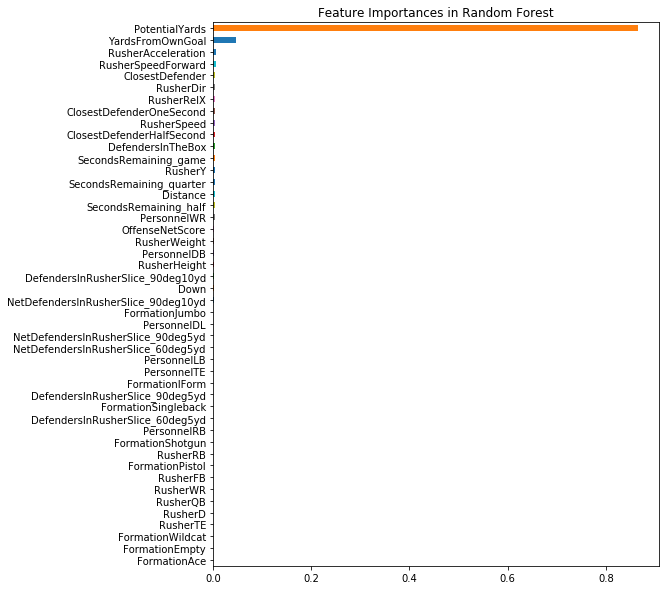

In [190]:
rf = RandomForestClassifier(min_samples_leaf=20)
rf.fit(X_train_trimmed, y_train_trimmed)
rf_coef = pd.Series(rf.feature_importances_, index = X_cols)
rf_coef = rf_coef.sort_values()
#rf_coef = rf_coef.drop('PotentialYards')
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
rf_coef.plot(kind = "barh")
plt.title("Feature Importances in Random Forest")

### XGBoost

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
xgboost = GradientBoostingClassifier()
print (cross_val_score(xgboost, X_train, y_train, scoring=crps_scorer, cv=3))

[0.02587057 0.02601929 0.0260732 ]


In [23]:
class Init_Clf:
    def __init__(self, estimator):
        self.estimator = estimator
    def predict(self, X):
        return self.estimator.predict_proba(X)[:, 1][:, np.newaxis]
    def fit(self, X, y,sample_weight=None, **fit_params):
        self.estimator.fit(X, y)

In [191]:
xgboost = GradientBoostingClassifier(init=Init_Clf(RandomForestClassifier(min_samples_leaf=20)))

param_dist = {
    'min_samples_leaf' : [10, 25]
}

xgboost_tune = GridSearchCV(xgboost, param_dist, scoring=crps_scorer, cv=3, return_train_score=True)
xgboost_tune.fit(X_train_trimmed, y_train_trimmed)

report_cols = ['mean_test_score','std_test_score']+['param_'+param for param in param_dist]
report = pd.DataFrame(xgboost_tune.cv_results_)[report_cols].sort_values(by='mean_test_score', ascending=True)
report

,mean_test_score,std_test_score,param_min_samples_leaf
0,0.037766,0.001073,10
1,0.037772,0.001098,25


Text(0.5, 1.0, 'Feature Importances in XGBoost')

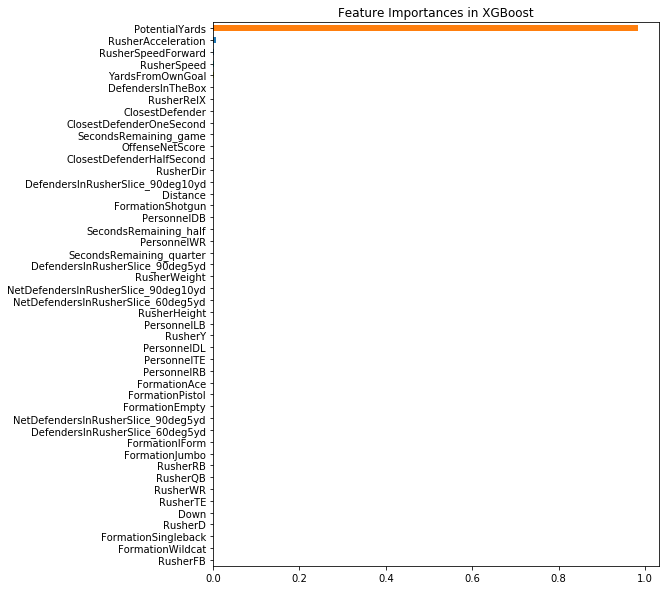

In [192]:
xgboost = GradientBoostingClassifier(min_samples_leaf=10, init=Init_Clf(RandomForestClassifier(min_samples_leaf=20)))
xgboost.fit(X_train_trimmed, y_train_trimmed)
xgboost_coef = pd.Series(xgboost.feature_importances_, index = X_cols)
xgboost_coef = xgboost_coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
xgboost_coef.plot(kind = "barh")
plt.title("Feature Importances in XGBoost")

### MLP Classifier

In [17]:
from sklearn.neural_network import MLPClassifier

In [19]:
mlp = MLPClassifier(max_iter=100)

param_dist = {
    'hidden_layer_sizes' : [(100,)]
}

mlp_tune = GridSearchCV(mlp, param_dist, scoring=crps_scorer, cv=3, return_train_score=True)
mlp_tune.fit(X_train_trimmed, y_train_trimmed)

report_cols = ['mean_test_score','std_test_score']+['param_'+param for param in param_dist]
report = pd.DataFrame(mlp_tune.cv_results_)[report_cols].sort_values(by='mean_test_score', ascending=True)
report

,mean_test_score,std_test_score,param_hidden_layer_sizes
0,0.038794,0.000649,"(100,)"
